## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master ```


## Problem 2: Sales Data Analysis

In [46]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import re

pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()
TV=df['TV']
radio=df['radio']
newspaper=df['newspaper']
sales=df['sales']


In [35]:
df[['TV','radio']]

,TV,radio
1,230.1,37.8
2,44.5,39.3
3,17.2,45.9
4,151.5,41.3
5,180.8,10.8
6,8.7,48.9
7,57.5,32.8
8,120.2,19.6
9,8.6,2.1
10,199.8,2.6



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

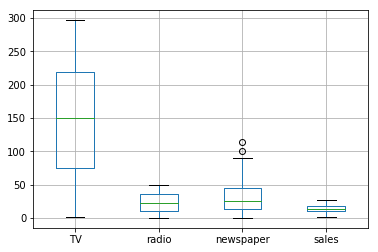

In [36]:
df.boxplot()


### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

C:\Users\tuleg\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018CD0E93470>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000018CD12E1630>]], dtype=object)

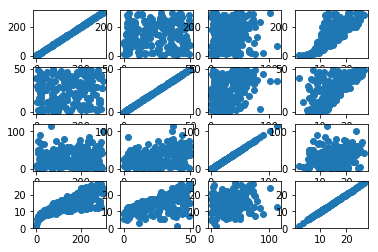

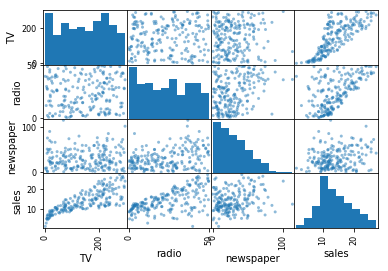

In [165]:
#Column 1 of subplot
plt.subplot(4,4,1)
plt.scatter(TV,TV)
plt.subplot(4,4,5)
plt.scatter(TV,radio)
plt.subplot(4,4,9)
plt.scatter(TV,newspaper)
plt.subplot(4,4,13)
plt.scatter(TV,sales)

#Column 2 of subplot
plt.subplot(4,4,2)
plt.scatter(radio,TV)
plt.subplot(4,4,6)
plt.scatter(radio,radio)
plt.subplot(4,4,10)
plt.scatter(radio,newspaper)
plt.subplot(4,4,14)
plt.scatter(radio,sales)

#Column 3 of subplot
plt.subplot(4,4,3)
plt.scatter(newspaper,TV)
plt.subplot(4,4,7)
plt.scatter(newspaper,radio)
plt.subplot(4,4,11)
plt.scatter(newspaper,newspaper)
plt.subplot(4,4,15)
plt.scatter(newspaper,sales)

#Column 4 of subplot
plt.subplot(4,4,4)
plt.scatter(sales,TV)
plt.subplot(4,4,8)
plt.scatter(sales,radio)
plt.subplot(4,4,12)
plt.scatter(sales,newspaper)
plt.subplot(4,4,16)
plt.scatter(sales,sales)
#using scatter_matrix
scatter_matrix(df)

In [8]:
from pandas.tools.plotting import scatter_matrix 

Which of the variables seem correlated with one another? Which don't? Explain your answer

TV and Sales seems to be the only variables that are correlated, all others do not--not counting variables compared to themselves. This is because the plot of these variables correspond such that--in this case--they show a somewhat linear relationship. An increase in TV yields an increase in sales (generally). Among other variables, it appears that radio or newspaper yields no expectable change in the other variable. 

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [38]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [39]:
y=df['sales']

b) Set X to be just the features described above in df

In [55]:
X=df[['TV','radio','newspaper']]
size=200 #size of df
X.head()


1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: sales, dtype: float64

c) Randomly split data into training and testing - 80% training, 20% testing.

In [41]:
#splitting features
X_train = X[0:int(size*0.8)]
X_test = X[int(size*0.8):]

#splitting sales (target)
#note y and x have same size (both from df)
y_train = y[0:int(size*0.8)]
y_test = y[int(size*0.8):]


d) Train model on training data, and make predictions on testing data

In [73]:
regr= LinearRegression()
#training model with training sets of data
regr.fit(X_train, y_train)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Residual sum of squares: 2.79
Variance score: 0.90


e) Evalute the R^2 on **testing** data. Is this good? Bad? Why?

In [163]:
#Total sum of squares  (TSS)
#total sum of squares = ((y_true - y_true.mean()) ** 2).sum()
print('Total Sum of Squares:')
TSS=((regr.predict(X_test) - y_test.mean()) ** 2).sum()
print(TSS)
#Recall residual sum of squares from above (RSS)
# RSS=((y_true - y_pred) ** 2).sum() 
print('Residual Sum of Squares:')
RSS = np.mean((regr.predict(X_test)- y_test) ** 2)
print(RSS)
#R2= 1-(RSS/TSS)
print('R^2:')
R2=1-(RSS/TSS)
print(R2)

#this is actually a bad sign because with such a high R^2 is appears our model is almost perfectly predicting the variable.
#Usually this suggests overfitting as an R^2 of .8 is more typical. However, assuming there was no overfitting, 
#this means that our model is near perfectly predicting sales, and is therefore a phenomenal (unheard of) model
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#redoing R^2
regr = LinearRegression(normalize=True)
regr.fit(X_train, y_train)
Ypred = regr.predict(X_test)
print('Coefficients: \n', regr.coef_)

print("Mean squared error: %.2f"
      % mean_squared_error(y_test, Ypred))
#R^2 score
print('R^2 score: %.2f' % r2_score(y_test, Ypred))
#^^ this value of R^2=.9 is far more believable. It is not as likely the overfitting was done
#the data appears to closely, but not near perfectly predict like before.

Total Sum of Squares:
1026.70998731
Residual Sum of Squares:
2.791145186276393
R^2:
0.997281466801
Coefficients: 
 [ 0.0472521   0.179922   -0.00094408]
Mean squared error: 2.79
R^2 score: 0.90


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

Text(0,0.5,'sales')

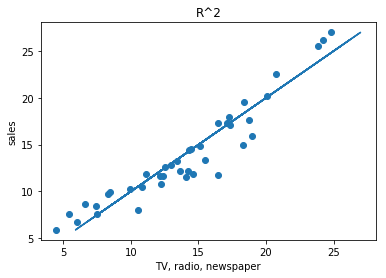

In [171]:
plt.title('R^2')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)
plt.xlabel('TV, radio, newspaper')
plt.ylabel('sales')
#Yes this looks like a good model. It appears it appears to capture the general trend well
# it features a positive slope, and the points scatter closely packed to the perfect y value line.

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

Answer: Yes, the coefficients determine importance (to an extent)

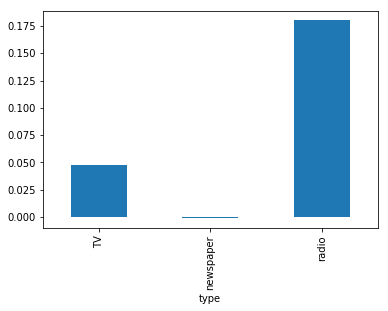

In [181]:
#To measure importance of features in the model we can look at the regression coefficients. However, we need to check if they
#are standardized in order to accurately judge their importance (different units and different scales will throw off measurement)

df = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':regr.coef_})
df.groupby('type')['coef'].mean().plot(kind='bar')
#However, this makes it look as if radio is the most important feature.
#this is because the variables were not standardardized 

Coefficients: 
 [ 0.55009624  0.35134375 -0.00422605]
Mean squared error: 0.00
R^2: 0.90


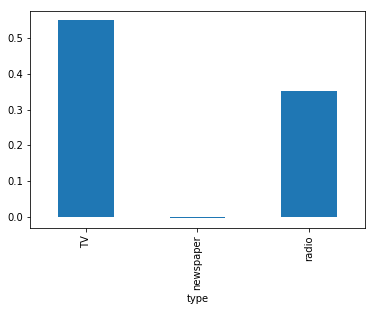

In [190]:
#Redoing with standardization
df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df_norm = (df - df.mean()) / (df.max() - df.min()) #standardizing vars
ynorm=df_norm['sales']
Xnorm=df_norm[['TV','radio','newspaper']]

#Splitting into test and train again,
sizen = float(len(Xnorm))
Xnorm_train = Xnorm[0:int(sizen*0.8)]
Xnorm_test = Xnorm[int(sizen*0.2):]
ynorm_train = ynorm[0:int(sizen*0.8)]
ynorm_test = ynorm[int(sizen*0.2):]

#Regression
regrnorm = LinearRegression()
regrnorm.fit(Xnorm_train, ynorm_train)
ynorm_pred = regrnorm.predict(Xnorm_test)

#coefficients, MSE, and R^2 again (normalized)
print('Coefficients: \n', regrnorm.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(ynorm_test, ynorm_pred))
#R^2
print('R^2: %.2f' % r2_score(ynorm_test, ynorm_pred))
regr.coef_
df_norm = pd.DataFrame({'type':['TV','radio','newspaper'], 'coef':regrnorm.coef_})
df_norm.groupby('type')['coef'].mean().plot(kind='bar')
#This now shows TV as the most important coefficient which is more
#accurate because the coefficients were normalized to achieve this

In [191]:
#Another way perhaps?

#Measuring importance of features
#need to standardize coefficients
import statsmodels.api as sm
from scipy.stats.mstats import zscore
#Prints many statistics, but most important are are the coefficients
sm.OLS(zscore(y_train), zscore(X_train)).fit().summary()
#These values make sense because TV seems to be most correlated to sales whereas Radio is less so and newspapers are not at all.
#TV having the largest coefficient indicates it has the most importance

#The function above was taken from:
#https://stackoverflow.com/questions/33913868/compute-linear-regression-standardized-coefficient-beta-with-python



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     451.6
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           5.83e-77
Time:                        13:26:57   Log-Likelihood:                -45.844
No. Observations:                 160   AIC:                             97.69
Df Residuals:                     157   BIC:                             106.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.7743      0.026     30.061      0.000       0.723       0.825
x2             0.5053      0.028     18.207      0.000       0.451       0.560
x3            -0.0040      0.028     -0.144      0.886      -0.059       0.051
==============================================================================
Omnibus:                       52.610   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.997
Skew:                          -1.388   Prob(JB):                     9.74e-29
Kurtosis:                       6.412   Cond. No.                         1.49
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

From g I can conclude that I can measure the importance of features in this model, especially if they are standardized. The higher the coefficient the more significant of an effect it has on the dependent variable (positive/negative determines the direction). With the standardized coefficients I calculated, it was clear and reasonable based on 'TV vs Sales' and 'Radio vs Sales' and 'Newspapers vs Sales' that TV was the most important feature and Radio was to a much lesser degree and then Newspaper pretty much did not have an impact. To measure importance of features, the STANDARDIZED regression coefficients must be calculated.

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

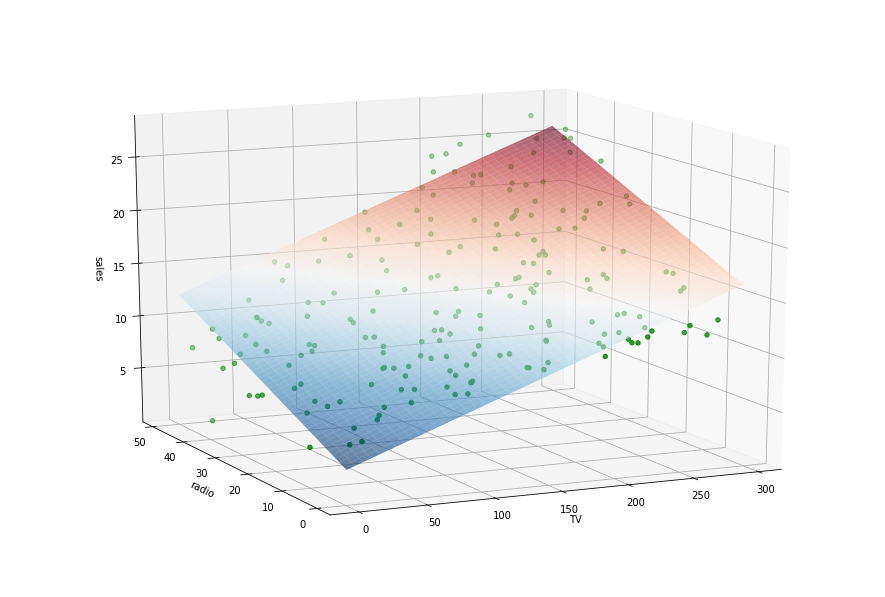

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Thu, 01 Mar 2018   Prob (F-statistic):           4.83e-98
Time:                        03:17:25   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#The code for the hyperplane is spliced together via components of:
#http://blog.datarobot.com/multiple-regression-using-statsmodels

#hyperplane solution
X2 = df[['TV', 'radio']]

y2 = df['sales']

# fitting a linear model with intercept on TV and Radio

X2 = sm.add_constant(X2) #model needs an intercept so create a new column of 1s

est = sm.OLS(y2, X2).fit()
## Creating 3D plot

# TV/Radio grid

xx1, xx2 = np.meshgrid(np.linspace(X2.TV.min(), X2.TV.max(), 100),

                       np.linspace(X2.radio.min(), X2.radio.max(), 100))

# plot the hyperplane by evaluating the parameters

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2


# create matplotlib 3d axes

fig = plt.figure(figsize=(12, 8))

ax2 = Axes3D(fig, azim=-115, elev=15)

# plot the hyperplane

surf = ax2.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)
#plotting in 3D
#ax = plt.axes(projection='3d')

ax2.scatter3D(df['TV'], df['radio'], df['sales'], c='green')
ax2.set_xlabel('TV')
ax2.set_ylabel('radio')
ax2.set_zlabel('sales');
plt.show()
est.summary()
#blue regions of the plane approximated too low, red region approximated too high


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Answer:
The learning rate is the step size when moving to find a minimum. If the learning rate is too large (large step size), the function can miss (overshoot) the actual minimum.Conversely, if the learning rate is too small (small step size), it will take too many iterations for the minimum to be found which is highly impractical, especially in an industry setting with limited resources (including time).

As we lower the learning rate, we will see the convergence take more and more iterations.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.03507497059234178, m = 1.4788027175308358, error = 112.64705664288809


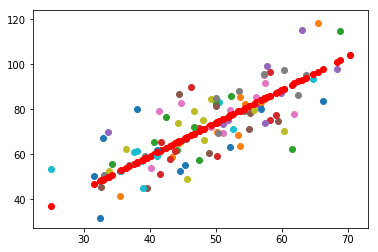

In [211]:
from numpy import *
    # The learning rate defines how fast our model learns (converges).
    # y = mx + b
    # m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(x):
    points = genfromtxt("/Users/tuleg/Documents/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = .0001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = x
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

if __name__ == '__main__':
    run(100)


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


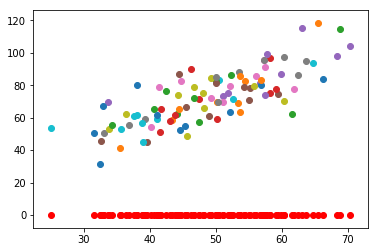

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.014547010110737297, m = 0.7370702973591052, error = 1484.586557408649


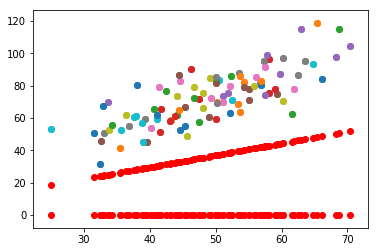

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.02187396295959641, m = 1.1067954543515157, error = 457.8542575737673


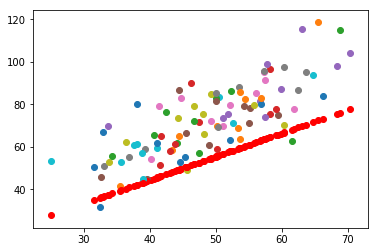

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.025579224321293136, m = 1.2922546649131115, error = 199.50998572553894


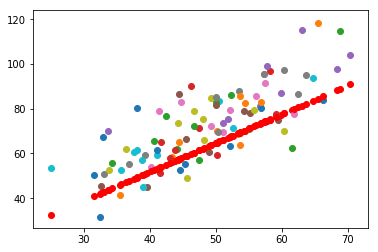

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.027467789559144355, m = 1.385283255651245, error = 134.50591058200533


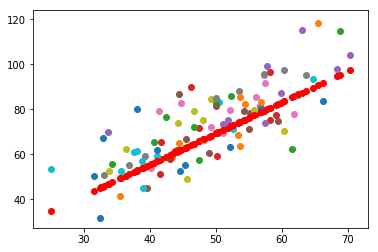

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.028445071981738963, m = 1.4319472323843205, error = 118.14969342239947


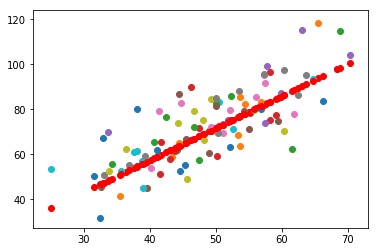

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.02896524076647862, m = 1.4553540088980408, error = 114.0341490603815


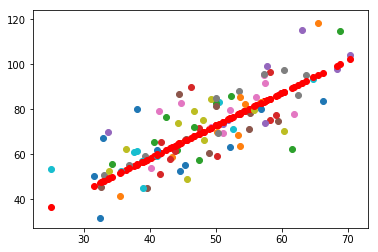

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.0292561141260467, m = 1.4670946177201354, error = 112.99857731713661


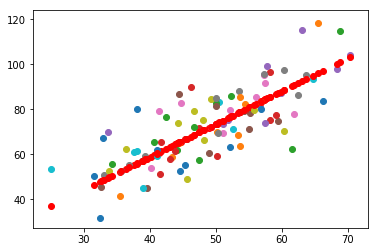

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.02943196916380713, m = 1.4729832982243762, error = 112.7379818756847


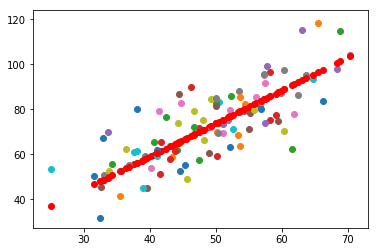

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.029550129024383073, m = 1.4759365618962286, error = 112.67238435909097


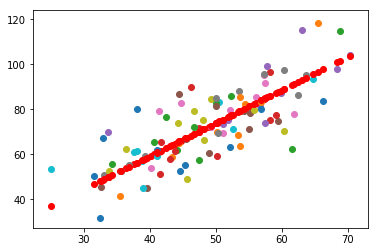

In [210]:
# Use this to visually discuss convergence rate based on learning rate

#for num in range(0,10):
#    run(num)
#    plt.show()
#If learning rate is too large, optimal solution is skipped over
#If learning rate is too small, too many iterations needed to converge

for x in range(0,10):
    run(x)
    plt.show(x)


Now trying a new learning rate of .0006 (6x faster)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = -2.266956351592026e+28, m = -1.1533917548181097e+30, error = 3.316317637107797e+63


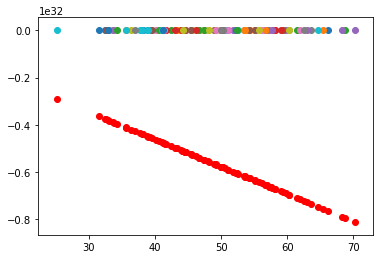

In [214]:
from numpy import *
    # The learning rate defines how fast our model learns (converges).
    # y = mx + b
    # m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(x):
    points = genfromtxt("/Users/tuleg/Documents/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = .0006
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = x
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

if __name__ == '__main__':
    run(00)

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


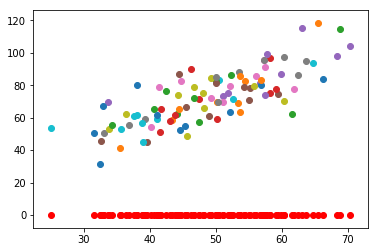

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.08728206066442376, m = 4.422421784154631, error = 21711.61348545944


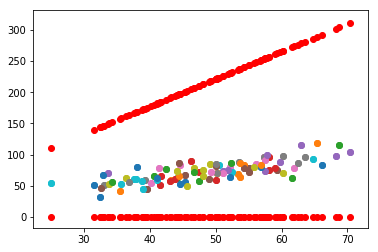

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = -0.0853579400987669, m = -4.379581484891755, error = 85673.1947463564


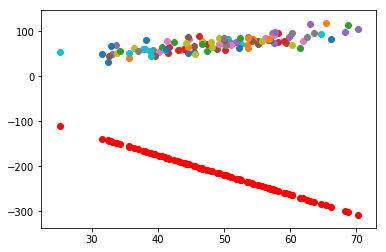

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.2593270050490397, m = 13.139096083011019, error = 339045.90182818234


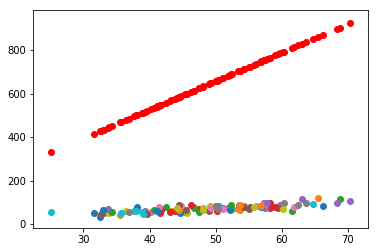

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = -0.4256241497265436, m = -21.72849167975953, error = 1342737.9198621428


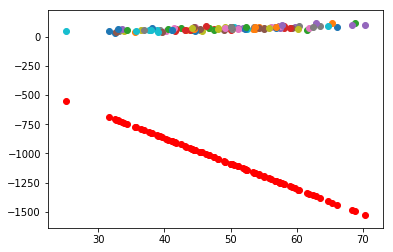

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.9387177580403341, m = 47.66873089317893, error = 5318689.703248874


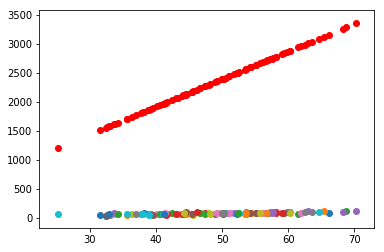

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = -1.7756650475338152, m = -90.45314730523982, error = 21068732.84185415


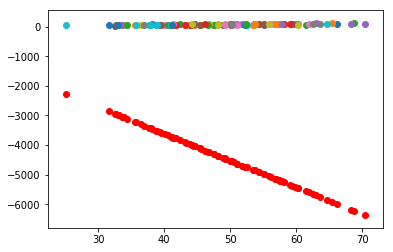

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 3.62787109763884, m = 184.45193005876962, error = 83459796.00738119


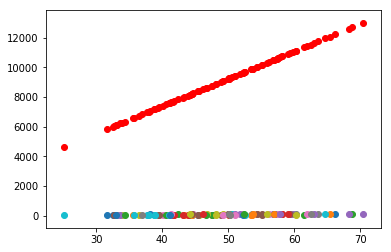

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = -7.125752977086995, m = -362.6939044522133, error = 330611167.5076605


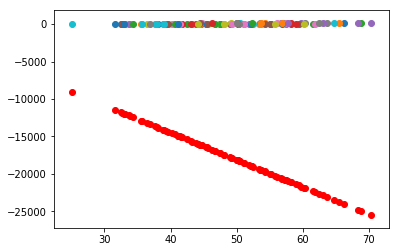

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 14.278350411387107, m = 726.2948827964979, error = 1309658443.4338894


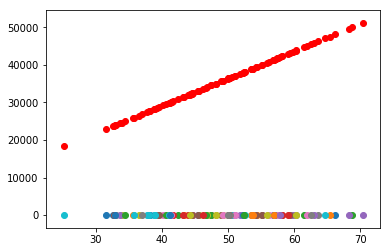

In [215]:
for x in range(0,10):
    run(x)
    plt.show(x)


With this higher learning rate, the function never convergences, it keeps oscillating back and forth, never truly finding the minimum. Now let's try a lower learning rate of .000001 (100x smaller)...

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 100 iterations b = 0.011490847112648363, m = 0.5815775397751681, error = 2119.9793173686226


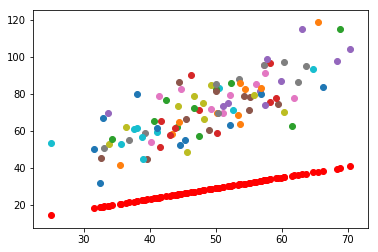

In [217]:
from numpy import *
    # The learning rate defines how fast our model learns (converges).
    # y = mx + b
    # m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(x):
    points = genfromtxt("/Users/tuleg/Documents/APMAE4990-/data/data.csv", delimiter=",")
    learning_rate = .000001
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = x
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

if __name__ == '__main__':
    run(100)


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 0 iterations b = 0, m = 0, error = 5565.107834483211


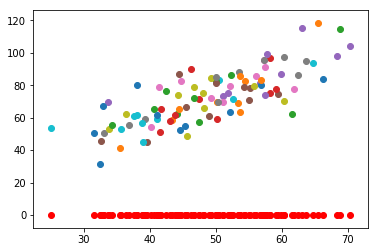

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1 iterations b = 0.00014547010110737294, m = 0.007370702973591051, error = 5510.894842719036


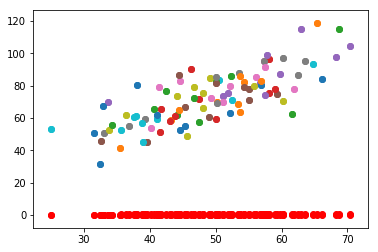

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 2 iterations b = 0.00029021819648855803, m = 0.01470467143314544, error = 5457.22088287138


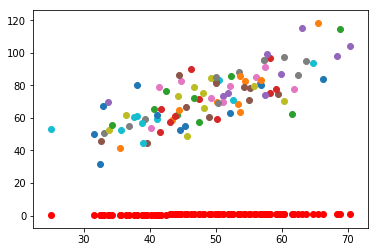

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 3 iterations b = 0.00043424788450933006, m = 0.022002088457857092, error = 5404.080595424002


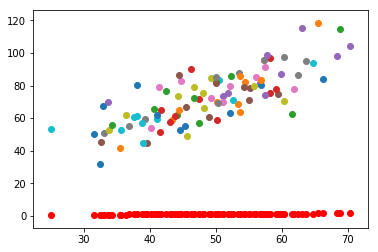

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 4 iterations b = 0.0005775627456017596, m = 0.029263136214481275, error = 5351.468674149584


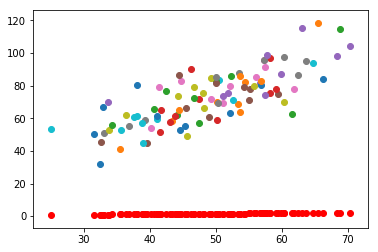

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5 iterations b = 0.0007201663423535918, m = 0.03648799596188203, error = 5299.379865579842


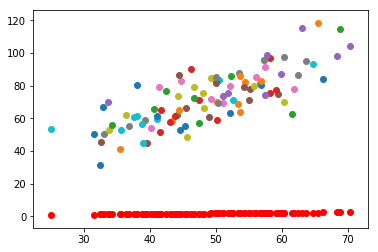

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 6 iterations b = 0.0008620622195971803, m = 0.04367684805555697, error = 5247.808968480964


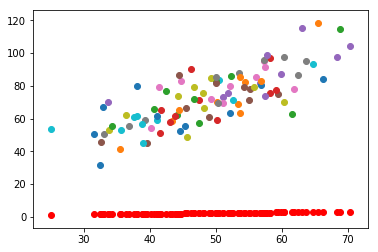

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 7 iterations b = 0.001003253904497977, m = 0.05082987195213953, error = 5196.750833334258


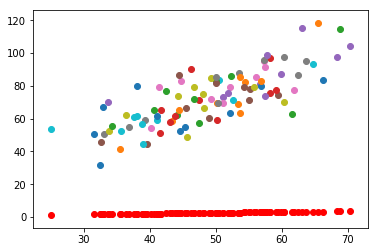

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 8 iterations b = 0.0011437449066425804, m = 0.05794724621387875, error = 5146.200361821946


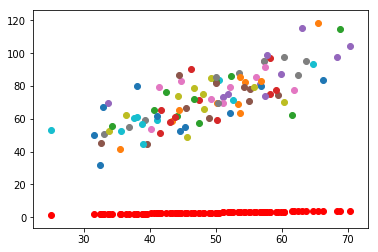

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 9 iterations b = 0.0012835387181263478, m = 0.06502914851309675, error = 5096.152506318077


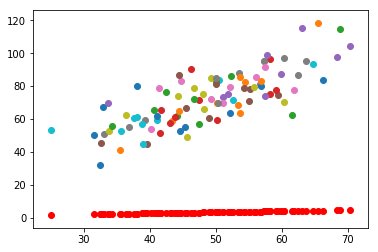

In [218]:
for x in range(0,10):
    run(x)
    plt.show(x)

Now with this 100x slower learning rate, convergence is also not achieved because iterations were held to 100. Even after 100 iterations, the function is definitely approaching convergence but is not there yet. So, to prove a point, we'll increase iterations until convergence is reached for this new learning rate.

Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 300 iterations b = 0.022754942492148312, m = 1.1485596795395128, error = 384.71447642859147


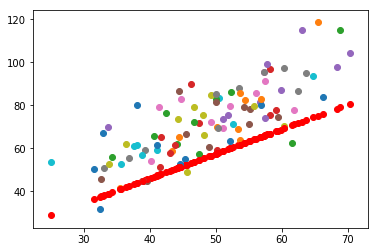

In [229]:


if __name__ == '__main__':
    run(300)


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 500 iterations b = 0.026977771468465424, m = 1.3572933460228074, error = 149.52475386307307


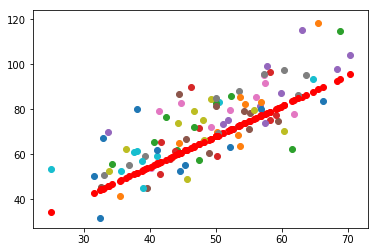

In [232]:

if __name__ == '__main__':
    run(500)


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 1000 iterations b = 0.029472081221699396, m = 1.4689072254569766, error = 112.89968139674588


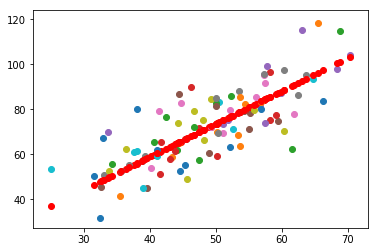

In [239]:

if __name__ == '__main__':
    run(1000)


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 5000 iterations b = 0.032071909576922776, m = 1.4788617417591663, error = 112.64886100122311


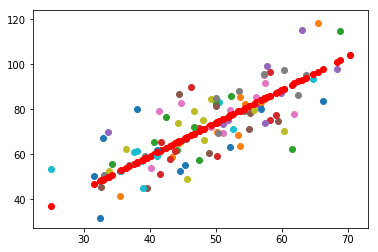

In [243]:

if __name__ == '__main__':
    run(5000)


Starting gradient descent at b = 0, m = 0, error = 5565.107834483211
Running...
After 10000 iterations b = 0.0350749481569599, m = 1.4788027179717984, error = 112.64705665636566


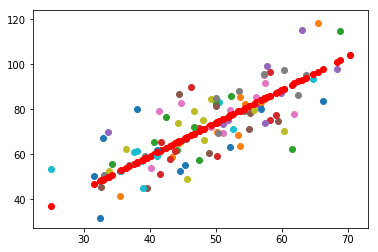

In [244]:

if __name__ == '__main__':
    run(10000)


We now see the function as converged somewhere between 5000 and 10,000 iterations! (coefficients nearly match b, m, and error of learning rate of .0001 in 100 iterations. To achieve convergence with a 100x slower learning rate, it took around 100x more iterations. So clearly you want to converge as fast as possible, but avoid the point of overshooting in order to optimize computing time and accuracy. We will look at a figure that hints at what this might be now:

## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.